In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
from scipy import stats

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head(10)

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
5,100005,b,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,...,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,100006,s,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,...,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
7,100007,s,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,...,-1.761,187.299,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638
8,100008,b,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,...,0.024,129.804,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
9,100009,s,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,...,0.845,294.741,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735


In [5]:
train.DER_mass_MMC.describe()

count    250000.000000
mean        -49.023079
std         406.345647
min        -999.000000
25%          78.100750
50%         105.012000
75%         130.606250
max        1192.026000
Name: DER_mass_MMC, dtype: float64

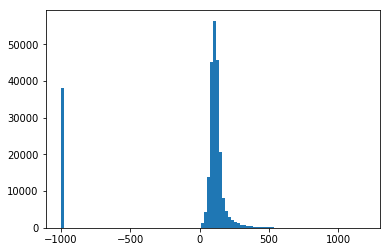

In [36]:
n, bins, patches = plt.hist(train.DER_mass_MMC, bins = 100)

In [37]:
n

array([3.8114e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.3210e+03, 4.3730e+03, 1.3819e+04, 4.5116e+04,
       5.6482e+04, 4.5755e+04, 2.0763e+04, 8.0240e+03, 4.4520e+03,
       2.9260e+03, 2.1510e+03, 1.4840e+03, 1.1770e+03, 8.1000e+02,
       6.7500e+02, 5.0200e+02, 3.8600e+02, 3.1200e+02, 2.7200e+02,
       1.8600e+02, 1.5900e+02, 1.1900e+02, 1.1000e+02, 9.3000e+01,
       6.6000e+01, 4.3000e+01, 4.5000e+01, 4.2000e+01, 3.6000e

In [21]:
temp_a = train.DER_mass_MMC[train.DER_mass_MMC != -999]

In [22]:
temp_a.head()

0    138.470
1    160.937
3    143.905
4    175.864
5     89.744
Name: DER_mass_MMC, dtype: float64

In [24]:
np.mean(temp_a)

121.85852835958778

In [29]:
stats.mode(temp_a)

ModeResult(mode=array([96.415]), count=array([10]))